In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
def text_to_df(text):
    lines = text.split('\n')
    items = [line.split('\t') for line in lines]
    # add column names to df
    columns = ["Model", "2.5% (pretrained)", "5% (pretrained)", "25% (pretrained)", "50% (pretrained)",
               "2.5% (random)", "5% (random)", "25% (random)", "50% (random)"]
    df = pd.DataFrame(items, columns=columns)
    # Convert empty cells to NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)
    return df

In [60]:
def generate_line_plot(name, df, desc, numerical_x_axis=False):
    # Define the data
    models = df['Model']

    pretrained_miou = [df.iloc[i, 1:5].values.tolist() for i in range(len(df))]
    random_miou = [df.iloc[i, 5:9].values.tolist() for i in range(len(df))]
    pretrained_miou = [list(map(float, i)) for i in pretrained_miou]
    random_miou = [list(map(float, i)) for i in random_miou]

    x_axis_labels = [2.5, 5, 25, 50] if numerical_x_axis else ['2.5%', '5%', '25%', '50%']

    # Create a figure and an axis object
    fig, ax = plt.subplots(figsize=(9, 5))

    # Plot the data
    colors = ['#377eb8', '#4daf4a', '#e41a1c', '#984ea3', '#ff7f00']
    markers = ['o', 's', '^', '*', 'D']
    handles = []
    labels = []
    for i in range(len(models)):
        pretrained_label = models[i] + ' (pretrained)'
        if pretrained_label not in ['Random Forest (pretrained)', 'XGBoost (pretrained)']:
            handle, = ax.plot(x_axis_labels, pretrained_miou[i], color=colors[i % len(colors)],
                              marker=markers[i % len(markers)], label=pretrained_label, linewidth=1.5, markersize=6)
            handles.append(handle)
            labels.append(pretrained_label)
        random_label = models[i] + ' (random)'

        handle, = ax.plot(x_axis_labels, random_miou[i], '--', color=colors[i % len(colors)],
                          marker=markers[i % len(markers)], label=random_label, linewidth=1.5, markersize=6)
        handles.append(handle)
        labels.append(random_label)

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Training Percentage', fontsize=12)
    ax.set_ylabel('mIoU Score', fontsize=12)

    if numerical_x_axis:
        ax.set_xticks(x_axis_labels)
        # ax.set_xticklabels([f"{x}%" for x in x_axis_labels], fontsize=10)
        # ax.set_xlim(0, 55)

    # Set the plot title and legend
    # ax.set_title(f'{name}:\nmIoU scores for different models and pretraining percentages', fontsize=14, fontweight='bold')
    ax.legend(handles, labels, fontsize=10, loc='upper left', bbox_to_anchor=(1.05, 1))

    # Set the tick label font size
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Set the background color of the plot
    ax.set_facecolor('#f0f0f0')

    plt.tight_layout()
    plt.savefig(f'{name}: {desc} (line).pdf')
    plt.show()

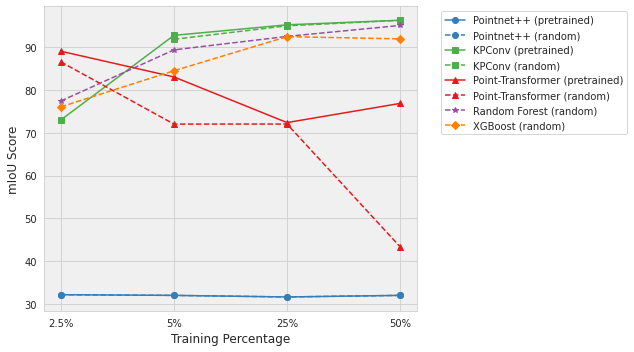

In [61]:
text = """Pointnet++	32.12	31.96	31.59	31.96	32.12	31.96	31.59	31.96
KPConv	73	92.8	95.27	96.34		91.88	95.04	96.32
Point-Transformer	89.09	83.08	72.39	76.88	86.6	72.04	72.05	43.32
Random Forest					77.44	89.4	92.56	95.12
XGBoost					76.08	84.52	92.5	91.98"""
df = text_to_df(text)
generate_line_plot("Bagni Nerone", df, "Validation mIoU", False)

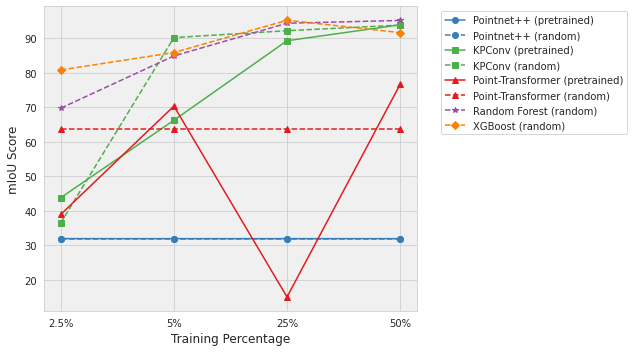

In [62]:
df = text_to_df("""Pointnet++	31.97	31.96	31.96	31.96	31.96	31.96	31.96	31.96
KPConv	43.84	66.28	89.33	93.94	36.54	90.24	92.23	93.86
Point-Transformer	38.98	70.38	15.05	76.7	63.75	63.75	63.75	63.75
Random Forest					69.79	84.93	94.4	95.21
XGBoost					80.85	85.91	95.27	91.68""")
generate_line_plot("Bagni Nerone", df, "50% Holdout mIoU")

# Bar plot
Bagni Nerone as a bar plot

In [63]:
def generate_bar_plot(name, df, desc):
    models = df.Model

    pretrained_miou = [df.iloc[i, 1:5].values.tolist() for i in range(len(df))]
    random_miou = [df.iloc[i, 5:9].values.tolist() for i in range(len(df))]
    pretrained_miou = [list(map(float, i)) for i in pretrained_miou]
    random_miou = [list(map(float, i)) for i in random_miou]

    x_labels = ['2.5% (pretrained)', '5% (pretrained)', '25% (pretrained)', '50% (pretrained)', '2.5% (random)',
                '5% (random)', '25% (random)', '50% (random)']
    x_positions = np.arange(len(x_labels))

    # Define the colors and patterns for each model
    colors = ['#377eb8', '#4daf4a', '#e41a1c', '#984ea3', '#ff7f00']
    patterns = ['-', 'x', '+', '\\', '/']

    # Create a figure and an axis object
    fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
    for i, model in enumerate(models):
        # Plot the pretrained data
        ax.bar(x_positions[:4] + i * 0.15, pretrained_miou[i], color=colors[i % len(colors)],
               width=0.15, label=model + ' (pretrained)')
        # Plot the random data
        ax.bar(x_positions[4:] + i * 0.15, random_miou[i], color=colors[i % len(colors)],
               hatch=patterns[i % len(patterns)], width=0.15, label=model + ' (random)')

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Training Percentage (Pretrained / Random)', fontsize=12)
    ax.set_ylabel('mIoU Score', fontsize=12)

    # Set the x-axis tick labels and limits
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, fontsize=10)
    ax.set_xlim(-0.5, len(x_labels) - 0.5)
    plt.xticks(rotation=90)

    # Set the y-axis limits and tick labels
    ax.set_ylim(0, 100)
    ax.set_yticks([0, 20, 40, 60, 80, 100])
    ax.set_yticklabels(['0\%', '20\%', '40\%', '60\%', '80\%', '100\%'], fontsize=10)

    # Set the plot title and legend
    ax.set_title('Bagni Nerone:\nmIoU scores for different models and pretraining percentages', fontsize=14,
                 fontweight='bold')
    ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1., 1))

    # Set the tick label font size

    ax.tick_params(axis='both', which='major', labelsize=10)
    # Set the background color of the plot

    ax.set_facecolor('#f0f0f0')

    plt.tight_layout()
    plt.savefig(f'{name}: {desc} (column).pdf')
    plt.show()

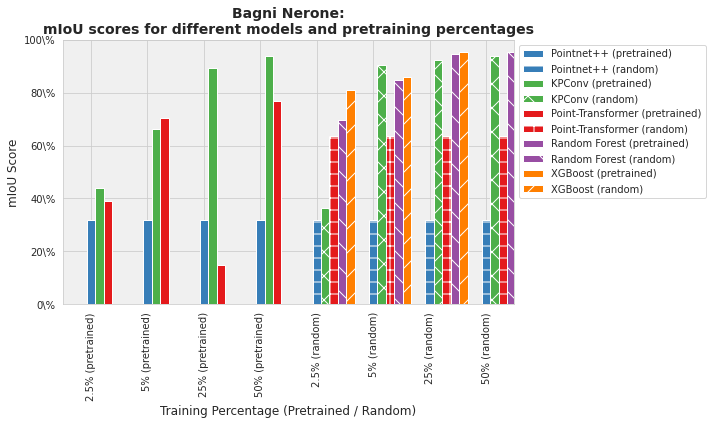

In [64]:
generate_bar_plot("Bagni Nerone", df, "Validation mIoU")